In [160]:
! pip install pycountry_convert
! pip install forex_python
from forex_python.converter import CurrencyRates
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
from matplotlib.ticker import PercentFormatter

%matplotlib inline
pd.set_option('display.max_columns', None)

# Importing Libraries 

## Testing

In [161]:
df = pd.read_csv('survey_results_public.csv')

In [162]:
list(df.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [163]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [164]:
df['Currency'].value_counts()

U.S. dollars ($)               7073
Euros (€)                      5849
British pounds sterling (£)    2176
Indian rupees (?)              2176
Canadian dollars (C$)          1062
Polish zloty (zl)               564
Australian dollars (A$)         469
Russian rubles (?)              366
Brazilian reais (R$)            359
Swedish kroner (SEK)            306
Swiss francs                    300
South African rands (R)         174
Mexican pesos (MXN$)            144
Japanese yen (¥)                123
Chinese yuan renminbi (¥)       121
Singapore dollars (S$)           79
Bitcoin (btc)                    67
Name: Currency, dtype: int64

In [165]:
df.Country.value_counts()

United States      11455
India               5197
United Kingdom      4395
Germany             4143
Canada              2233
                   ...  
Pitcairn Island        1
French Guyana          1
Gabon                  1
Monaco                 1
Saint Helena           1
Name: Country, Length: 201, dtype: int64

In [166]:
#Removing columns that aren't necessary for my analysis
df = df[['Respondent','Professional', 'Country','EmploymentStatus','FormalEducation','HomeRemote','YearsCodedJob','CareerSatisfaction','PronounceGIF', 'JobSecurity','HoursPerWeek','WorkStart','Gender','Salary','Currency']]
df.head(40)

,Respondent,Professional,Country,EmploymentStatus,FormalEducation,HomeRemote,YearsCodedJob,CareerSatisfaction,PronounceGIF,JobSecurity,HoursPerWeek,WorkStart,Gender,Salary,Currency
0,1,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,0.0,6:00 AM,Male,NaN,NaN
1,2,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,"More than half, but not all, the time",NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,10:00 AM,Male,NaN,British pounds sterling (£)
2,3,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,"Less than half the time, but at least one day ...",20 or more years,8.0,"With a hard ""g,"" like ""gift""",Agree,NaN,9:00 AM,Male,113750.000000,British pounds sterling (£)
3,4,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,"Less than half the time, but at least one day ...",9 to 10 years,6.0,"With a soft ""g,"" like ""jiff""",Somewhat agree,5.0,9:00 AM,Male,NaN,NaN
4,5,Professional developer,Switzerland,Employed full-time,Master's degree,Never,10 to 11 years,6.0,"With a soft ""g,"" like ""jiff""",NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,New Zealand,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,0.0,10:00 AM,NaN,NaN,NaN
6,7,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,"Less than half the time, but at least one day ...",8 to 9 years,7.0,"With a hard ""g,"" like ""gift""",NaN,1.0,7:00 AM,Male,NaN,NaN
7,8,Professional developer,Poland,Employed full-time,Master's degree,All or almost all the time (I'm full-time remote),7 to 8 years,7.0,"With a hard ""g,"" like ""gift""",NaN,1.0,Noon,Male,NaN,NaN
8,9,Professional developer,Colombia,Employed full-time,Bachelor's degree,"Less than half the time, but at least one day ...",7 to 8 years,6.0,"With a hard ""g,"" like ""gift""",Agree,2.0,9:00 AM,Male,NaN,NaN
9,10,Professional developer,France,"Independent contractor, freelancer, or self-em...",Master's degree,It's complicated,8 to 9 years,6.0,"With a soft ""g,"" like ""jiff""",NaN,1.0,10:00 AM,Male,NaN,NaN


In [167]:
df.query("Country == 'India'").head(50)

,Respondent,Professional,Country,EmploymentStatus,FormalEducation,HomeRemote,YearsCodedJob,CareerSatisfaction,PronounceGIF,JobSecurity,HoursPerWeek,WorkStart,Gender,Salary,Currency
26,27,Professional developer,India,Employed full-time,Bachelor's degree,Never,9 to 10 years,5.0,"With a soft ""g,"" like ""jiff""",NaN,3.0,10:00 AM,NaN,NaN,Indian rupees (?)
61,62,Professional developer,India,Employed full-time,Bachelor's degree,A few days each month,1 to 2 years,5.0,"Enunciating each letter: ""gee eye eff""",Strongly agree,NaN,10:00 AM,Male,6636.323594,Indian rupees (?)
66,67,Professional developer,India,Employed full-time,Bachelor's degree,"More than half, but not all, the time",8 to 9 years,7.0,"With a soft ""g,"" like ""jiff""",NaN,10.0,1:00 PM,Male,NaN,NaN
94,95,Professional developer,India,"Not employed, and not looking for work",Secondary school,NaN,1 to 2 years,7.0,"With a soft ""g,"" like ""jiff""",Agree,0.0,10:00 AM,Male,NaN,NaN
107,108,Professional developer,India,Employed full-time,Master's degree,A few days each month,Less than a year,7.0,"With a soft ""g,"" like ""jiff""",Somewhat agree,3.0,7:00 AM,Male,NaN,NaN
112,113,Professional developer,India,Employed full-time,Bachelor's degree,A few days each month,3 to 4 years,8.0,"With a hard ""g,"" like ""gift""",Disagree,1.0,2:00 PM,Male,NaN,NaN
133,134,Professional developer,India,Employed full-time,Bachelor's degree,A few days each month,Less than a year,6.0,"With a soft ""g,"" like ""jiff""",Agree,0.0,11:00 AM,Male,14682.131846,Indian rupees (?)
137,138,Professional developer,India,Employed full-time,Bachelor's degree,All or almost all the time (I'm full-time remote),4 to 5 years,10.0,"With a soft ""g,"" like ""jiff""",NaN,NaN,NaN,NaN,NaN,Indian rupees (?)
164,165,Professional developer,India,Employed full-time,Bachelor's degree,A few days each month,5 to 6 years,6.0,"Enunciating each letter: ""gee eye eff""",NaN,NaN,NaN,NaN,NaN,NaN
178,179,Student,India,"Independent contractor, freelancer, or self-em...",Bachelor's degree,"Less than half the time, but at least one day ...",NaN,NaN,"Enunciating each letter: ""gee eye eff""",Disagree,NaN,Noon,Male,NaN,Indian rupees (?)


In [168]:
df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [169]:
df['EmploymentStatus'].value_counts()

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

In [170]:
#Filtering for only full-time professional developers

df = df.query("Professional == 'Professional developer'")
df = df.query("EmploymentStatus == 'Employed full-time'")

df.head()

,Respondent,Professional,Country,EmploymentStatus,FormalEducation,HomeRemote,YearsCodedJob,CareerSatisfaction,PronounceGIF,JobSecurity,HoursPerWeek,WorkStart,Gender,Salary,Currency
2,3,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,"Less than half the time, but at least one day ...",20 or more years,8.0,"With a hard ""g,"" like ""gift""",Agree,NaN,9:00 AM,Male,113750.0,British pounds sterling (£)
4,5,Professional developer,Switzerland,Employed full-time,Master's degree,Never,10 to 11 years,6.0,"With a soft ""g,"" like ""jiff""",NaN,NaN,NaN,NaN,NaN,NaN
7,8,Professional developer,Poland,Employed full-time,Master's degree,All or almost all the time (I'm full-time remote),7 to 8 years,7.0,"With a hard ""g,"" like ""gift""",NaN,1.0,Noon,Male,NaN,NaN
8,9,Professional developer,Colombia,Employed full-time,Bachelor's degree,"Less than half the time, but at least one day ...",7 to 8 years,6.0,"With a hard ""g,"" like ""gift""",Agree,2.0,9:00 AM,Male,NaN,NaN
11,12,Professional developer,Canada,Employed full-time,Bachelor's degree,A few days each month,8 to 9 years,8.0,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,Canadian dollars (C$)


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30211 entries, 2 to 51390
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Respondent          30211 non-null  int64  
 1   Professional        30211 non-null  object 
 2   Country             30211 non-null  object 
 3   EmploymentStatus    30211 non-null  object 
 4   FormalEducation     30211 non-null  object 
 5   HomeRemote          30174 non-null  object 
 6   YearsCodedJob       29978 non-null  object 
 7   CareerSatisfaction  29935 non-null  float64
 8   PronounceGIF        30030 non-null  object 
 9   JobSecurity         19063 non-null  object 
 10  HoursPerWeek        11971 non-null  float64
 11  WorkStart           22767 non-null  object 
 12  Gender              21806 non-null  object 
 13  Salary              12444 non-null  float64
 14  Currency            16946 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 3.7

In [172]:
df['Country'].value_counts()

United States           7416
India                   3076
United Kingdom          2818
Germany                 2185
Canada                  1352
                        ... 
Netherlands Antilles       1
Eritrea                    1
Guam                       1
Burkina Faso               1
American Samoa             1
Name: Country, Length: 174, dtype: int64

In [173]:
#Cretaing a function that converts the country to its corresponding continent 

import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        return None
    return country_continent_name


In [174]:
#Creating the Continent column and applying the function above
df['Continent'] = df['Country'].apply(country_to_continent)

In [175]:
df['Continent'].value_counts()

Europe           12967
North America     9160
Asia              5813
South America      900
Oceania            680
Africa             555
Antarctica           1
Name: Continent, dtype: int64

In [176]:

df.head()


,Respondent,Professional,Country,EmploymentStatus,FormalEducation,HomeRemote,YearsCodedJob,CareerSatisfaction,PronounceGIF,JobSecurity,HoursPerWeek,WorkStart,Gender,Salary,Currency,Continent
2,3,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,"Less than half the time, but at least one day ...",20 or more years,8.0,"With a hard ""g,"" like ""gift""",Agree,NaN,9:00 AM,Male,113750.0,British pounds sterling (£),Europe
4,5,Professional developer,Switzerland,Employed full-time,Master's degree,Never,10 to 11 years,6.0,"With a soft ""g,"" like ""jiff""",NaN,NaN,NaN,NaN,NaN,NaN,Europe
7,8,Professional developer,Poland,Employed full-time,Master's degree,All or almost all the time (I'm full-time remote),7 to 8 years,7.0,"With a hard ""g,"" like ""gift""",NaN,1.0,Noon,Male,NaN,NaN,Europe
8,9,Professional developer,Colombia,Employed full-time,Bachelor's degree,"Less than half the time, but at least one day ...",7 to 8 years,6.0,"With a hard ""g,"" like ""gift""",Agree,2.0,9:00 AM,Male,NaN,NaN,South America
11,12,Professional developer,Canada,Employed full-time,Bachelor's degree,A few days each month,8 to 9 years,8.0,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,Canadian dollars (C$),North America


In [177]:
df['Currency'].value_counts()

U.S. dollars ($)               5852
Euros (€)                      4362
British pounds sterling (£)    1874
Indian rupees (?)              1600
Canadian dollars (C$)           856
Polish zloty (zl)               420
Australian dollars (A$)         389
Russian rubles (?)              293
Brazilian reais (R$)            279
Swedish kroner (SEK)            268
Swiss francs                    208
South African rands (R)         153
Mexican pesos (MXN$)            119
Japanese yen (¥)                104
Chinese yuan renminbi (¥)        88
Singapore dollars (S$)           51
Bitcoin (btc)                    30
Name: Currency, dtype: int64

### Q1 Salary vs Continent, Gender and Degree 

In [178]:
#Removing the null values for both salary and currency, as our analysis will be comparing to salary directly so need to drop the null values 
salary_df = df[df['Currency'].notnull() & df['Salary'].notnull()]

In [179]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 2 to 51390
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Respondent          11592 non-null  int64  
 1   Professional        11592 non-null  object 
 2   Country             11592 non-null  object 
 3   EmploymentStatus    11592 non-null  object 
 4   FormalEducation     11592 non-null  object 
 5   HomeRemote          11586 non-null  object 
 6   YearsCodedJob       11542 non-null  object 
 7   CareerSatisfaction  11566 non-null  float64
 8   PronounceGIF        11581 non-null  object 
 9   JobSecurity         7980 non-null   object 
 10  HoursPerWeek        5103 non-null   float64
 11  WorkStart           10883 non-null  object 
 12  Gender              10530 non-null  object 
 13  Salary              11592 non-null  float64
 14  Currency            11592 non-null  object 
 15  Continent           11564 non-null  object 
dtypes: f

In [180]:
# Renaming the currency to its ISO codes so I can run a function below
salary_df.loc[salary_df['Currency'].str.contains('Indian'), 'Currency'] = 'INR'
salary_df.loc[salary_df['Currency'].str.contains('Russian'), 'Currency'] = 'RUB'
salary_df.loc[salary_df['Currency'].str.contains('U.S.'), 'Currency'] = 'USD'
salary_df.loc[salary_df['Currency'].str.contains('Euro'), 'Currency'] = 'EUR'
salary_df.loc[salary_df['Currency'].str.contains('Canadian'), 'Currency'] = 'CAD'
salary_df.loc[salary_df['Currency'].str.contains('Polish'), 'Currency'] = 'PLN'
salary_df.loc[salary_df['Currency'].str.contains('Australian'), 'Currency'] = 'AUD'
salary_df.loc[salary_df['Currency'].str.contains('Braz'), 'Currency'] = 'BRL'
salary_df.loc[salary_df['Currency'].str.contains('Swedish'), 'Currency'] = 'SEK'
salary_df.loc[salary_df['Currency'].str.contains('Swiss'), 'Currency'] = 'CHF'
salary_df.loc[salary_df['Currency'].str.contains('South'), 'Currency'] = 'ZAR'
salary_df.loc[salary_df['Currency'].str.contains('Mexican'), 'Currency'] = 'MXN'
salary_df.loc[salary_df['Currency'].str.contains('Japanese'), 'Currency'] = 'JPY'
salary_df.loc[salary_df['Currency'].str.contains('Chinese'), 'Currency'] = 'CNY'
salary_df.loc[salary_df['Currency'].str.contains('Singapore'), 'Currency'] = 'SGD'
salary_df.loc[salary_df['Currency'].str.contains('British'), 'Currency'] = 'GBP'
salary_df = salary_df[salary_df.Currency != 'Bitcoin (btc)'] 

salary_df['Currency'].value_counts()

USD    4202
EUR    2998
GBP    1371
INR     784
CAD     651
PLN     280
AUD     263
BRL     219
SEK     193
RUB     176
CHF     133
ZAR     104
MXN      86
JPY      52
CNY      47
SGD      27
Name: Currency, dtype: int64

In [181]:
#Testing
c = CurrencyRates()
c.convert('GBP', 'USD', 1, datetime.strptime('2017-01-01', '%Y-%m-%d'))

1.2311663435258942

In [182]:
#Finding the exchanghe rate of the salary currencies to convert to USD as of 01,01,2017
Currencies = salary_df.Currency.unique().tolist()

df_currency = pd.DataFrame(Currencies, columns = ['Currency'])


df_currency['exrate'] = df_currency.apply( lambda x: c.convert(x.Currency, 'USD', 1, datetime.strptime('2017-01-01', '%Y-%m-%d')), axis = 1)

In [183]:
df_currency

,Currency,exrate
0,GBP,1.231166
1,USD,1.000000
2,EUR,1.054100
3,BRL,0.307273
4,INR,0.014723
5,PLN,0.239009
6,SEK,0.110348
7,CAD,0.742952
8,RUB,0.016393
9,CHF,0.981563


In [184]:
#Merging the exchange rate column to the salary_df
salary_df = salary_df.merge(df_currency, on='Currency', how='left')

In [185]:
#Calculating the salary in USD
salary_df['AdjSalary'] = salary_df['Salary'] * salary_df['exrate']


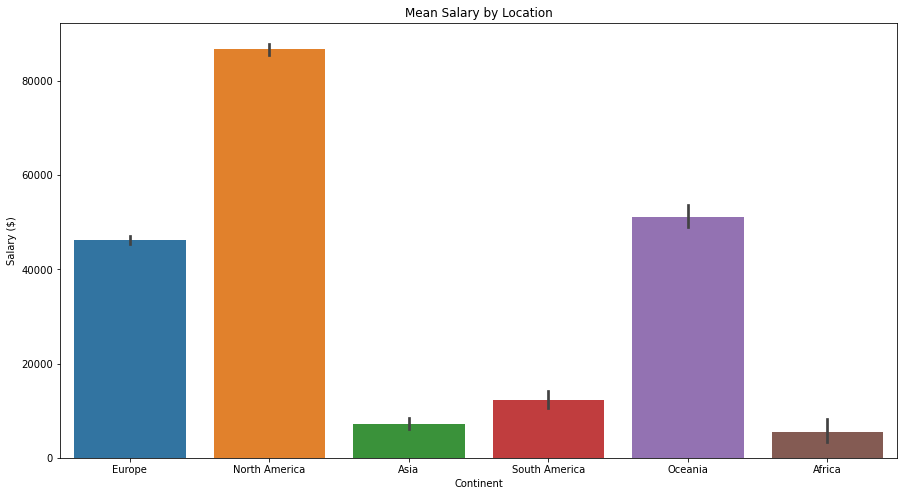

In [186]:
#Creating a bar plot comparing mean salary vs different continents
plt.figure(figsize=(15,8))
sns.barplot(x = 'Continent', y = 'AdjSalary', data = salary_df)
plt.title('Mean Salary by Location')
plt.ylabel('Salary ($)');

We can see that North American's have the highest mean salary of around 85,000 USD, with Oceania and Europe in second and third, respectively. South America, Asia and Africa earn considerably less, all 3 with an average salary of less than 20,000 USD

In [187]:
salary_df.Gender.value_counts()

Male                                                       9578
Female                                                      739
Other                                                        43
Male; Other                                                  42
Gender non-conforming                                        40
Male; Gender non-conforming                                  20
Female; Transgender                                          17
Female; Gender non-conforming                                13
Transgender                                                   8
Male; Female; Transgender; Gender non-conforming; Other       5
Male; Female                                                  5
Male; Transgender                                             4
Transgender; Gender non-conforming                            4
Female; Transgender; Gender non-conforming                    2
Male; Female; Other                                           1
Male; Female; Transgender               

In [188]:
#Filter gender to male and female for results purposes 
salary_gender_df = salary_df.query("Gender in ('Male','Female')")
salary_gender_df.Gender.value_counts()

Male      9578
Female     739
Name: Gender, dtype: int64

''

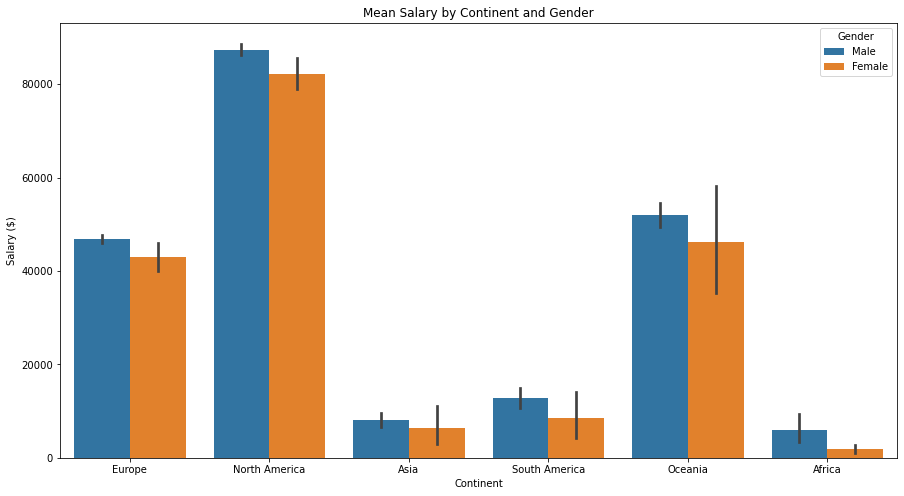

In [189]:
#Creating a bar plot comparing mean salary vs different continents with gender

plt.figure(figsize=(15,8))
sns.barplot(x = 'Continent', y = 'AdjSalary', hue = 'Gender', data = salary_gender_df)
plt.title('Mean Salary by Continent and Gender')
plt.ylabel('Salary ($)')
;


When comparing salary for each gender per continent we can see that females are paid less in every single continent, which seems to show that for professional developers the salary gap is still a problem.

In [190]:

salary_df.FormalEducation.value_counts()

Bachelor's degree                                                    5807
Master's degree                                                      2825
Some college/university study without earning a bachelor's degree    1805
Secondary school                                                      600
Doctoral degree                                                       281
Professional degree                                                   133
I never completed any formal education                                 54
Primary/elementary school                                              46
I prefer not to answer                                                 35
Name: FormalEducation, dtype: int64

In [191]:
#Filtering for bachelors, masters degree and secondary school level of education 

Education = ['Bachelor\'s degree','Master\'s degree','Secondary school']
salary_education_df = salary_df.query("FormalEducation in @Education")
salary_education_df.head()

,Respondent,Professional,Country,EmploymentStatus,FormalEducation,HomeRemote,YearsCodedJob,CareerSatisfaction,PronounceGIF,JobSecurity,HoursPerWeek,WorkStart,Gender,Salary,Currency,Continent,exrate,AdjSalary
0,3,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,"Less than half the time, but at least one day ...",20 or more years,8.0,"With a hard ""g,"" like ""gift""",Agree,NaN,9:00 AM,Male,113750.0,GBP,Europe,1.231166,140045.171576
2,18,Professional developer,United States,Employed full-time,Bachelor's degree,All or almost all the time (I'm full-time remote),20 or more years,9.0,"With a hard ""g,"" like ""gift""",Agree,NaN,10:00 AM,Male,130000.0,USD,North America,1.000000,130000.000000
3,19,Professional developer,United States,Employed full-time,Bachelor's degree,A few days each month,3 to 4 years,5.0,"With a hard ""g,"" like ""gift""",Strongly agree,NaN,NaN,NaN,82500.0,USD,North America,1.000000,82500.000000
4,23,Professional developer,Israel,Employed full-time,Bachelor's degree,A few days each month,5 to 6 years,8.0,"With a hard ""g,"" like ""gift""",NaN,NaN,9:00 AM,Male,100764.0,USD,Asia,1.000000,100764.000000
5,26,Professional developer,United States,Employed full-time,Master's degree,"Less than half the time, but at least one day ...",16 to 17 years,7.0,"With a hard ""g,"" like ""gift""",Agree,0.0,8:00 AM,Male,175000.0,USD,North America,1.000000,175000.000000


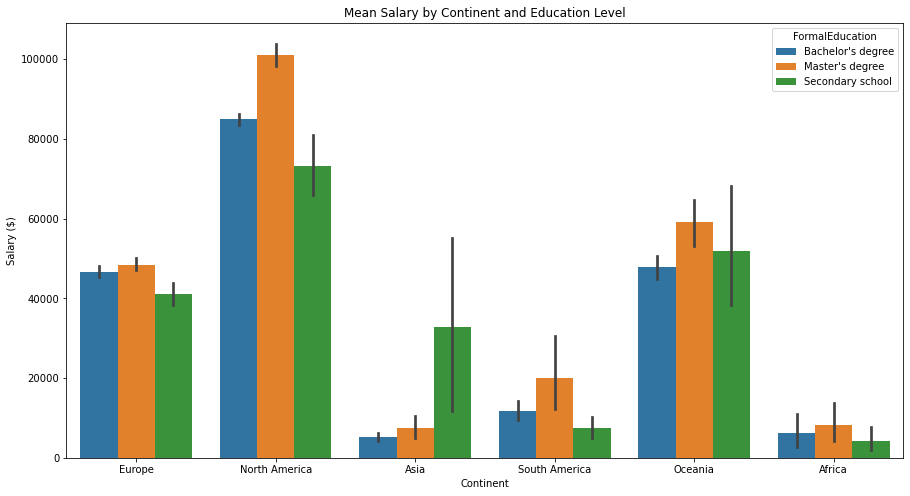

In [192]:
#Creating a bar plot comparing mean salary vs different continents with degree classification
plt.figure(figsize=(15,8))
sns.barplot(x = 'Continent', y = 'AdjSalary', hue = 'FormalEducation', data = salary_education_df)
plt.title('Mean Salary by Continent and Education Level')
plt.ylabel('Salary ($)');

When comparing salary with education level per continent, we ca see that the for North American, Europe, South America and Africa the higher your education, the greater your salary. Interestingly, those with a bachelor's degree earn the lowest salary in Asia and Oceania. In Asia, you earn considerably more if you didn't go to university and only went to secondary school.

### Q2 pay progression

In [193]:
salary_df.YearsCodedJob.value_counts()

2 to 3 years        1323
3 to 4 years        1191
1 to 2 years        1176
4 to 5 years        1013
5 to 6 years         941
20 or more years     800
6 to 7 years         618
9 to 10 years        597
Less than a year     588
7 to 8 years         561
10 to 11 years       517
8 to 9 years         420
15 to 16 years       249
11 to 12 years       242
12 to 13 years       235
14 to 15 years       232
16 to 17 years       227
13 to 14 years       183
17 to 18 years       174
18 to 19 years       126
19 to 20 years       123
Name: YearsCodedJob, dtype: int64

In [194]:
# changing the number of year coding to a numerical value for plotting purposes and dropping null values 

years = {'Less than a year' : 0,
            '1 to 2 years' : 1, 
            '2 to 3 years' : 2,
            '3 to 4 years' : 3, 
            '4 to 5 years' : 4, 
            '5 to 6 years' : 5, 
            '6 to 7 years' : 6, 
            '7 to 8 years' : 7, 
            '8 to 9 years' : 8, 
            '9 to 10 years' : 9, 
            '10 to 11 years' : 10, 
            '11 to 12 years' : 11, 
            '12 to 13 years' : 12,
            '13 to 14 years' : 13, 
            '14 to 15 years' : 14, 
            '15 to 16 years' : 15, 
            '16 to 17 years' : 16,
            '17 to 18 years' : 17, 
            '18 to 19 years' : 18, 
            '19 to 20 years' : 19, 
            '20 or more years' : 20}


salary_df['YearsCodedJob'] = salary_df['YearsCodedJob'].map(years)
salary_df = salary_df[salary_df['YearsCodedJob'].notna()]

In [195]:
# Testing
salary_df.YearsCodedJob.unique()

array([20.,  3.,  5., 16.,  1.,  9.,  7.,  4.,  2., 13., 11., 17., 12.,
       10.,  0., 14., 15.,  6.,  8., 18., 19.])

In [196]:
# grouping by continent and years coding to return the percentage change in salary by year 

continents = ('Africa','Asia','Europe', 'Oceania', 'North America', 'South America')

pct_change_df = pd.DataFrame()

for i in continents:
    
    new_df = salary_df.query("Continent == '" + i + "'").groupby(['Continent','YearsCodedJob'])['Salary'].mean().pct_change().cumsum().reset_index()
    pct_change_df = pd.concat([pct_change_df, new_df],ignore_index=True)
    

pct_change_df.reindex()




,Continent,YearsCodedJob,Salary
0,Africa,0.0,NaN
1,Africa,1.0,0.091445
2,Africa,2.0,-0.010135
3,Africa,3.0,0.873048
4,Africa,4.0,1.140907
...,...,...,...
117,South America,15.0,2.145264
118,South America,16.0,2.001939
119,South America,17.0,2.013423
120,South America,18.0,2.282301


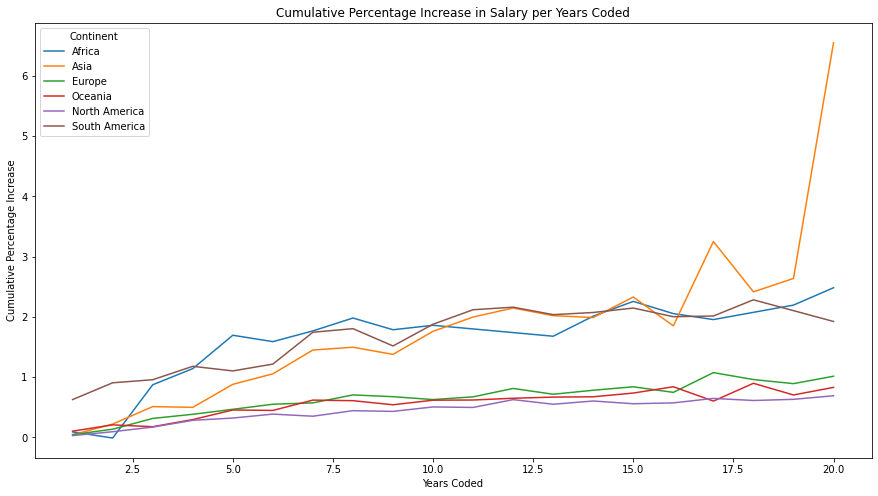

In [197]:
#Line graph of cumulative percentage change in salary by years coding experience by continent  

plt.figure(figsize=(15,8))
ax = sns.lineplot(x="YearsCodedJob", y="Salary", hue="Continent", data=pct_change_df)
plt.title('Cumulative Percentage Increase in Salary per Years Coded')
plt.ylabel('Cumulative Percentage Increase')
plt.xlabel('Years Coded');

We can see that the more experience you have the higher your salary for all continents. North America, Europe and Oceania all follow a similar pattern with an 100% increase in salary after 20 years experience.
Africa, Asia and South America all follow a similar pattern with a much higher increase in salary, around 100% higher than North America, Europe and Oceania. This is until Asia rapidly increases from 18-20 years experience to 600% increase in salary. This seems unlikely and may be due to a currency error on the original spreadsheet. 

In [210]:
#Testing for Asia's extreme values
salary_df.query("Continent == 'Asia'")
salary_df.loc[(salary_df['YearsCodedJob']>=19) & (salary_df['Continent'].str.startswith('Asia'))]

,Respondent,Professional,Country,EmploymentStatus,FormalEducation,HomeRemote,YearsCodedJob,CareerSatisfaction,PronounceGIF,JobSecurity,HoursPerWeek,WorkStart,Gender,Salary,Currency,Continent,exrate,AdjSalary
816,3008,Professional developer,India,Employed full-time,Master's degree,A few days each month,19.0,7.0,"With a soft ""g,"" like ""jiff""",Strongly agree,0.0,8:00 PM,Male,16150.345030,INR,Asia,0.014723,237.788049
2036,8243,Professional developer,Japan,Employed full-time,Master's degree,Never,20.0,4.0,"With a soft ""g,"" like ""jiff""",Somewhat agree,2.0,10:00 AM,Male,74698.167289,JPY,Asia,0.008542,638.082157
4389,18427,Professional developer,India,Employed full-time,Master's degree,A few days each month,19.0,7.0,"With a soft ""g,"" like ""jiff""",Agree,NaN,6:00 PM,Male,16150.345030,INR,Asia,0.014723,237.788049
4392,18451,Professional developer,Japan,Employed full-time,Bachelor's degree,A few days each month,20.0,10.0,"With a soft ""g,"" like ""jiff""",Agree,NaN,10:00 AM,Male,65143.750543,JPY,Asia,0.008542,556.466997
5293,23490,Professional developer,India,Employed full-time,Some college/university study without earning ...,About half the time,20.0,8.0,"Enunciating each letter: ""gee eye eff""",Agree,NaN,9:00 PM,Male,3171.340479,INR,Asia,0.014723,46.692926
5944,26839,Professional developer,Israel,Employed full-time,Master's degree,"Less than half the time, but at least one day ...",20.0,9.0,"With a soft ""g,"" like ""jiff""",Somewhat agree,NaN,10:00 AM,Male,165000.000000,USD,Asia,1.000000,165000.000000
7967,38343,Professional developer,India,Employed full-time,Master's degree,"More than half, but not all, the time",20.0,7.0,"With a soft ""g,"" like ""jiff""",Agree,0.0,8:00 AM,NaN,20554.984584,INR,Asia,0.014723,302.639335
10469,47580,Professional developer,Israel,Employed full-time,Some college/university study without earning ...,A few days each month,20.0,8.0,"With a hard ""g,"" like ""gift""",Agree,NaN,10:00 AM,Male,76488.000000,USD,Asia,1.000000,76488.000000
11334,50411,Professional developer,Bangladesh,Employed full-time,Doctoral degree,"Less than half the time, but at least one day ...",20.0,9.0,"With a soft ""g,"" like ""jiff""",Agree,NaN,7:00 AM,Male,150000.000000,USD,Asia,1.000000,150000.000000


### Q3 GIF vs JIF


In [199]:
#Dropping null GIF Values

GIF_df = df[df['PronounceGIF'].notnull()]

GIF_df.PronounceGIF.value_counts()

With a hard "g," like "gift"              20099
With a soft "g," like "jiff"               7897
Enunciating each letter: "gee eye eff"     1557
Some other way                              477
Name: PronounceGIF, dtype: int64

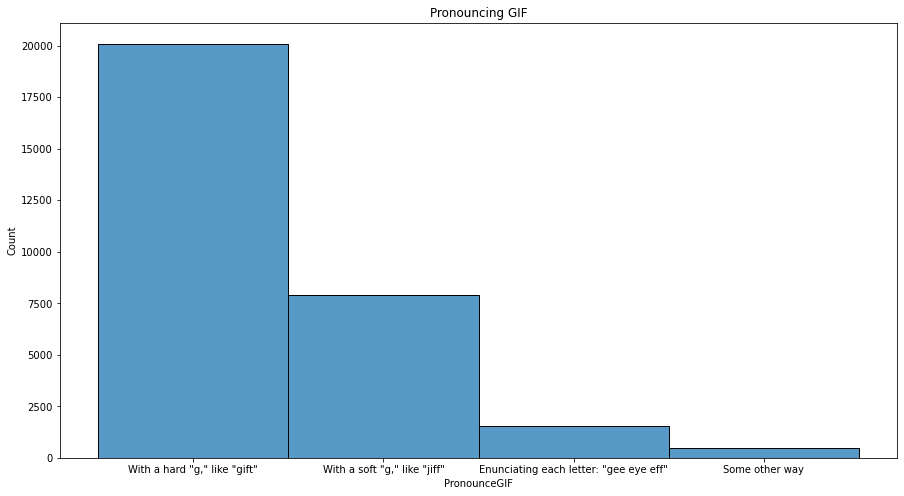

In [200]:
#Plotting histogram of PronounceGIF


plt.figure(figsize=(15,8))
sns.histplot(data=GIF_df, x="PronounceGIF")
plt.title('Pronouncing GIF');


We can see that the majority of people say GIF with a hard G with around 20000, which is more than double the amount of people who pronounce it with a soft G. 

In [202]:
GIF_df.Continent.value_counts()

Europe           12904
North America     9122
Asia              5753
South America      894
Oceania            677
Africa             547
Antarctica           1
Name: Continent, dtype: int64

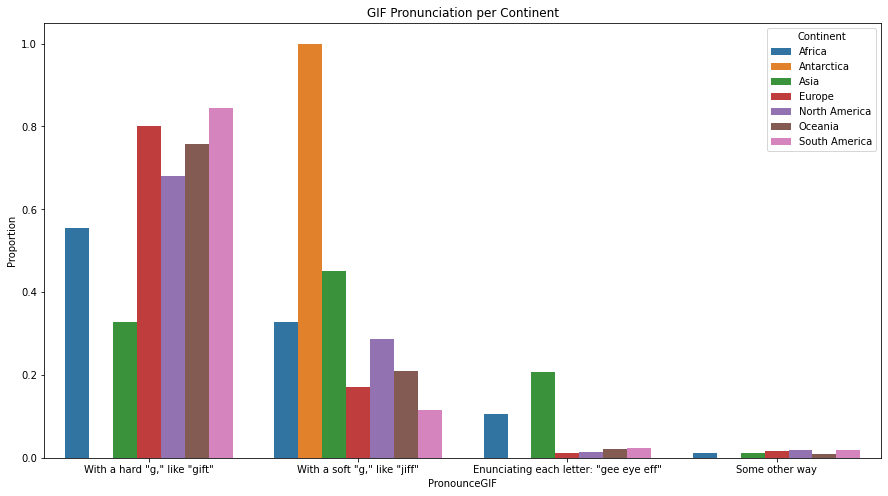

In [209]:
# Plotting a bar chart of GIF Pronuncation with proportion.

plt.figure(figsize=(15,8))
y = 'Proportion'
(GIF_df['PronounceGIF']
 .groupby(df['Continent'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='PronounceGIF', y=y, hue='Continent'))
plt.title('GIF Pronunciation per Continent');


When comparing per continent, we can see that the vast majoirty of Europeans pronounce GIF with a hard G, as do North Americans. However, more Asians pronounce with a soft G.